# What is KNN

- KNN stands for K-Nearest Neighbors, which is a non-parametric, lazy learning algorithm used for classification and regression.
- Non-parametric = It doesn’t make assumptions about the data distribution.
- Lazy learning = It doesn’t “learn” during training — it just memorizes.
- Instance-based = It stores all training data and makes decisions at prediction time.

### Distance Metrics in KNN

**1. Euclidean Distance**

- It’s the shortest straight-line distance between two points — like using a ruler.
- Formula: d(x,y)= sqrt (n ∑ i=1 (xi −yi)^2)

**When to use:**
- Continuous features
- Low to moderate dimensionality
- Data is scaled properly

**2. Manhattan Distance (a.k.a. L1 Distance or City Block)** 
- It’s the distance you’d walk in a city with a grid layout — no diagonal shortcuts.
- Formula: d(x,y)=i=1∑n∣xi−yi∣

**When to use:**

- Grid-like paths (e.g., chessboard moves)
- Sparse data
- More robust to outliers

**3. Minkowski Distance (Generalized Distance)**
- Formula: d(x,y)=(i=1∑n∣xi−yi∣p)1/p
- If p = 1: Manhattan
- If p = 2: Euclidean

**When to use:**
- When you want a flexible distance metric
- Tune p based on model performance

**4. Hamming Distance**
- Formula: d(x,y)=i=1∑n1 if xi=yi
- It counts how many positions are different in two strings/vectors.

**When to use:**
- Binary or categorical data (e.g., yes/no, male/female)
- Text (e.g., spelling comparison)

**5. Cosine Similarity (and Distance)**
-  Formula: cosine_similarity(x,y)=∥x∥⋅∥y∥x⋅y
- Cosine distance = 1 - cosine similarity
- Measures the angle between two vectors, not their magnitude. Great for text data.

**When to use:**
- Text data, TF-IDF, Word embeddings
- High-dimensional, sparse data
- When direction matters more than magnitude

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
# Define two 2D points
x = np.array([1, 2])
y = np.array([4, 6])

In [19]:
def minkowski_distance(x, y, p):
    return np.power(np.sum(np.abs(x - y)**p), 1/p)

In [20]:
# Cosine similarity and distance
cos_sim = cosine_similarity([x], [y])[0][0]
cos_dist = 1 - cos_sim

In [21]:
# Binary data for Hamming Distance
x_bin = np.array([1, 0, 1, 1])
y_bin = np.array([1, 1, 0, 1])
hamming_dist = np.sum(x_bin != y_bin)

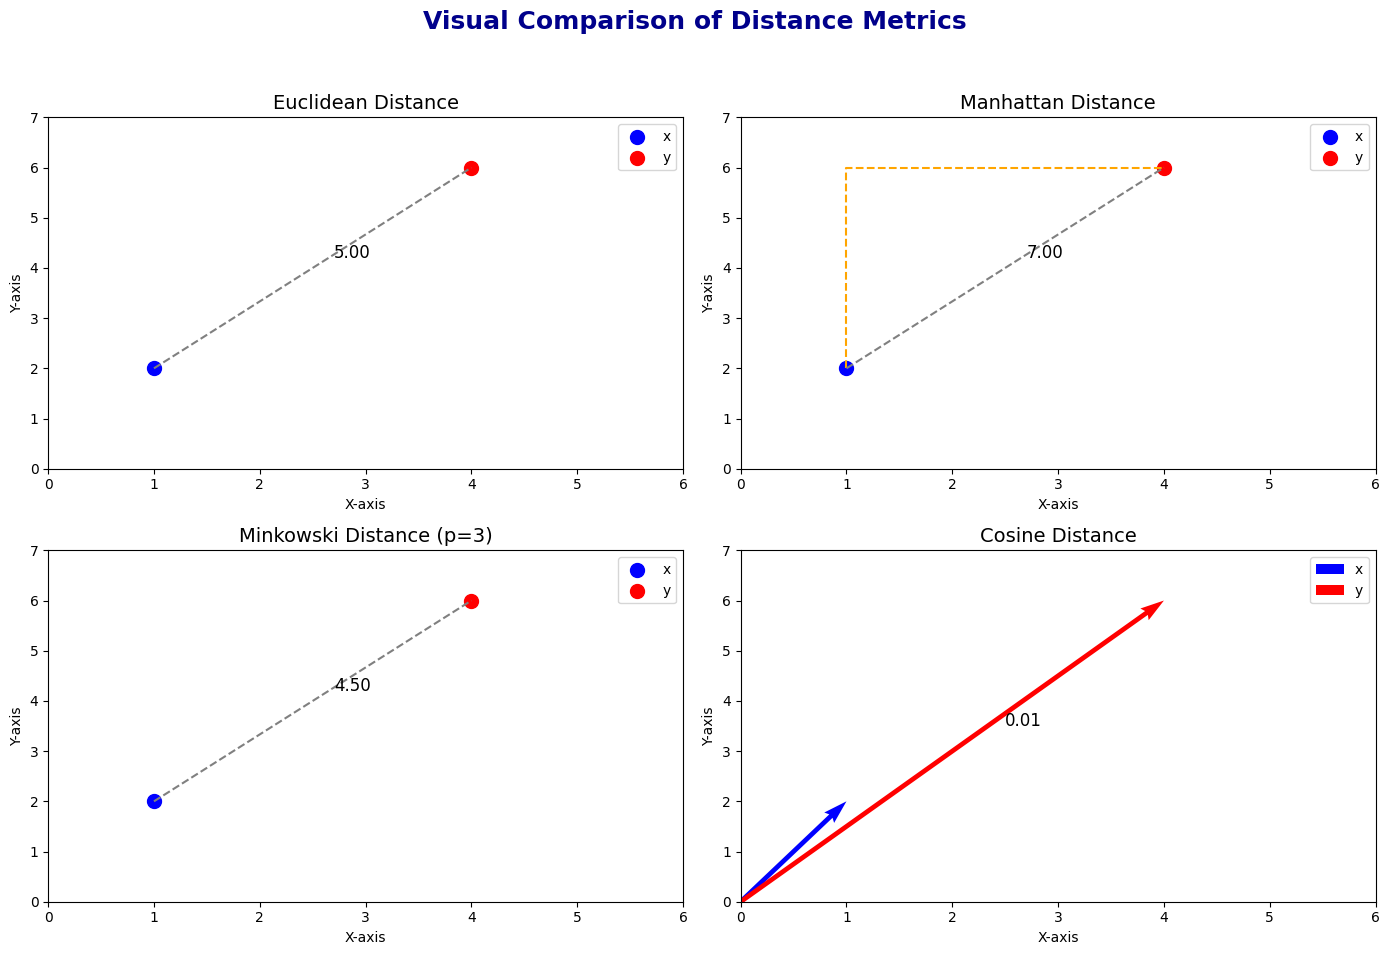

In [28]:
# Setup plot
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Visual Comparison of Distance Metrics", fontsize=18, fontweight='bold', color='darkblue')

def plot_arrow(ax, start, end, label):
    ax.plot(*zip(*[start, end]), linestyle='--', color='gray')
    ax.scatter(*start, c='blue', label='x', s=100)
    ax.scatter(*end, c='red', label='y', s=100)
    ax.annotate(f"{label}", ((start[0] + end[0])/2 + 0.2, (start[1] + end[1])/2 + 0.2),
                fontsize=12, color='black')
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 7)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()
    
# Euclidean Distance
axs[0, 0].set_title("Euclidean Distance", fontsize=14)
plot_arrow(axs[0, 0], x, y, f"{np.linalg.norm(x - y):.2f}")

# Manhattan Distance
axs[0, 1].set_title("Manhattan Distance", fontsize=14)
axs[0, 1].plot([x[0], x[0], y[0]], [x[1], y[1], y[1]], linestyle='--', color='orange')
plot_arrow(axs[0, 1], x, y, f"{np.sum(np.abs(x - y)):.2f}")

# Minkowski Distance (p=3)
axs[1, 0].set_title("Minkowski Distance (p=3)", fontsize=14)
plot_arrow(axs[1, 0], x, y, f"{minkowski_distance(x, y, 3):.2f}")

# Cosine Distance (vector angle)
axs[1, 1].set_title("Cosine Distance", fontsize=14)
axs[1, 1].quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='blue', label='x')
axs[1, 1].quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='red', label='y')
axs[1, 1].annotate(f"{cos_dist:.2f}", (2.5, 3.5), fontsize=12)
axs[1, 1].set_xlim(0, 6)
axs[1, 1].set_ylim(0, 7)
axs[1, 1].set_xlabel('X-axis')
axs[1, 1].set_ylabel('Y-axis')
axs[1, 1].legend()

# Display the 2x2 grid
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

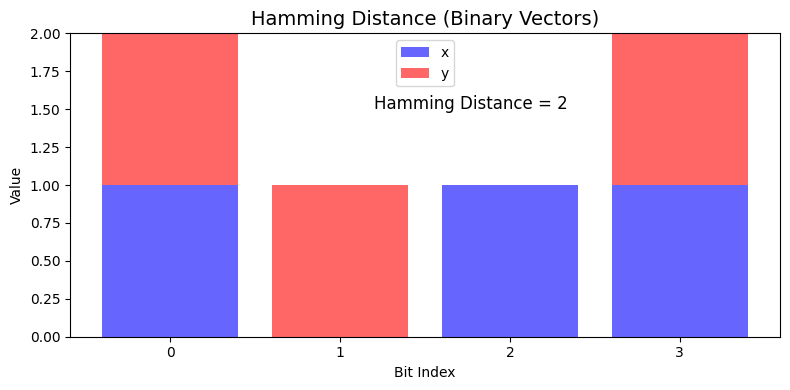

In [29]:
# Hamming Distance (displayed separately)
plt.figure(figsize=(8, 4))
plt.title("Hamming Distance (Binary Vectors)", fontsize=14)
plt.bar(range(len(x_bin)), x_bin, color='blue', alpha=0.6, label='x')
plt.bar(range(len(y_bin)), y_bin, color='red', alpha=0.6, label='y', bottom=x_bin)
plt.text(1.2, 1.5, f'Hamming Distance = {hamming_dist}', fontsize=12)
plt.ylim(0, 2)
plt.xticks(range(len(x_bin)))
plt.xlabel('Bit Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

#  KNN Classification Code with Wine Dataset

In [31]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
#Load wine quality dataset (red wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

In [33]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [34]:
#Convert quality scores into 3 categories: Low (3–5), Medium (6), High (7–8)
def categorize_quality(value):
    if value <= 5:
        return 'Low'
    elif value == 6:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(categorize_quality)

In [35]:
# Prepare data
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

In [37]:
print(y)

0          Low
1          Low
2          Low
3       Medium
4          Low
         ...  
1594       Low
1595    Medium
1596    Medium
1597       Low
1598    Medium
Name: quality_label, Length: 1599, dtype: object


In [38]:
#Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [40]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
#Train KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [54]:
#Predict
y_pred = knn.predict(X_test_scaled)

In [55]:
#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.709375

Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.63      0.61        43
         Low       0.78      0.77      0.77       149
      Medium       0.67      0.67      0.67       128

    accuracy                           0.71       320
   macro avg       0.68      0.69      0.69       320
weighted avg       0.71      0.71      0.71       320



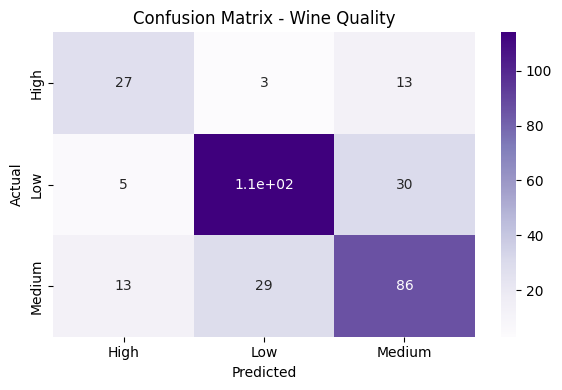

In [56]:
#Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Purples',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Wine Quality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()